In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# Test
file_path = "./data/"

bikesharing = pd.read_csv(f"{file_path}chicago_2017_prepared.csv", parse_dates=["start_time", "end_time"])
### REMOVE
bikesharing = bikesharing.drop(bikesharing[(bikesharing["user_type"] != "Customer") & (bikesharing["user_type"] != "Subscriber")].index)
bikesharing

FileNotFoundError: [Errno 2] No such file or directory: './data/chicago_2017_prepared.csv'

In [ ]:
bikesharing['day_of_year'] = bikesharing['start_time'].dt.dayofyear
bikesharing['duration'] = bikesharing["end_time"] - bikesharing["start_time"]
def get_seconds(x):
    return x.seconds
bikesharing["duration"] = bikesharing["duration"].apply(lambda x: get_seconds(x))

In [ ]:
bikesharing

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,...,start_weekday,max_temp,min_temp,precip,start_lat,start_long,end_lat,end_long,day_of_year,duration
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,...,6,-0.6,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525,1,356
1,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.914680,-87.643320,41.910522,-87.653106,1,327
2,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.898203,-87.637536,41.907066,-87.667252,1,745
3,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.880317,-87.635185,41.875885,-87.640795,1,323
4,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.937725,-87.644095,41.911386,-87.638677,1,776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828949,2017-12-31 23:21:00,2017-12-31 23:23:00,226,117,Racine Ave & Belmont Ave,Wilton Ave & Belmont Ave,2562,Subscriber,23,31,...,6,-12.8,-12.8,0.0,41.939743,-87.658865,41.940180,-87.653040,365,120
3828950,2017-12-31 23:34:00,2017-12-31 23:39:00,337,182,Clark St & Chicago Ave,Wells St & Elm St,6351,Subscriber,23,31,...,6,-12.8,-12.8,0.0,41.896544,-87.630931,41.903222,-87.634324,365,300
3828951,2017-12-31 23:41:00,2017-12-31 23:51:00,93,343,Sheffield Ave & Willow St,Racine Ave & Wrightwood Ave,5840,Subscriber,23,31,...,6,-12.8,-12.8,0.0,41.913688,-87.652855,41.928887,-87.658971,365,600
3828952,2017-12-31 23:42:00,2017-12-31 23:47:00,240,245,Sheridan Rd & Irving Park Rd,Clarendon Ave & Junior Ter,5353,Subscriber,23,31,...,6,-12.8,-12.8,0.0,41.954245,-87.654406,41.961004,-87.649603,365,300


In [ ]:
bikesharing_relevant = bikesharing[["user_type", "start_hour", "start_weekday", "min_temp", "precip", "duration"]]
bikesharing_relevant

,user_type,start_hour,start_weekday,min_temp,precip,duration
0,Customer,0,6,-0.6,0.0,356
1,Subscriber,0,6,-0.6,0.0,327
2,Subscriber,0,6,-0.6,0.0,745
3,Subscriber,0,6,-0.6,0.0,323
4,Subscriber,0,6,-0.6,0.0,776
...,...,...,...,...,...,...
3828949,Subscriber,23,6,-12.8,0.0,120
3828950,Subscriber,23,6,-12.8,0.0,300
3828951,Subscriber,23,6,-12.8,0.0,600
3828952,Subscriber,23,6,-12.8,0.0,300


In [ ]:
continuous_cols = ["min_temp"]
ordinal_cols = ["start_hour", "start_weekday", "duration"]
categorical_cols = ["user_type", "precip"]
bikesharing_transformed = pd.DataFrame(StandardScaler().fit_transform(bikesharing_relevant[continuous_cols + ordinal_cols]), columns=bikesharing_relevant[continuous_cols + ordinal_cols].columns)
bikesharing_transformed

,min_temp,start_hour,start_weekday,duration
0,-1.911782,-2.964342,1.553288,-0.380665
1,-1.911782,-2.964342,1.553288,-0.399067
2,-1.911782,-2.964342,1.553288,-0.133819
3,-1.911782,-2.964342,1.553288,-0.401605
4,-1.911782,-2.964342,1.553288,-0.114148
...,...,...,...,...
3828942,-3.249360,1.990494,1.553288,-0.530422
3828943,-3.249360,1.990494,1.553288,-0.416200
3828944,-3.249360,1.990494,1.553288,-0.225831
3828945,-3.249360,1.990494,1.553288,-0.416200


In [ ]:
#bikesharing_transformed["user_type"] = LabelEncoder().fit_transform(bikesharing_relevant["user_type"])
bikesharing_transformed["user_type"] = bikesharing_relevant["user_type"]
bikesharing_transformed["precip"] = bikesharing_relevant["precip"]
bikesharing_transformed

,min_temp,start_hour,start_weekday,duration,user_type,precip
0,-1.911782,-2.964342,1.553288,-0.380665,Customer,0.0
1,-1.911782,-2.964342,1.553288,-0.399067,Subscriber,0.0
2,-1.911782,-2.964342,1.553288,-0.133819,Subscriber,0.0
3,-1.911782,-2.964342,1.553288,-0.401605,Subscriber,0.0
4,-1.911782,-2.964342,1.553288,-0.114148,Subscriber,0.0
...,...,...,...,...,...,...
3828942,-3.249360,1.990494,1.553288,-0.530422,Subscriber,0.0
3828943,-3.249360,1.990494,1.553288,-0.416200,Subscriber,0.0
3828944,-3.249360,1.990494,1.553288,-0.225831,Subscriber,0.0
3828945,-3.249360,1.990494,1.553288,-0.416200,Subscriber,0.0


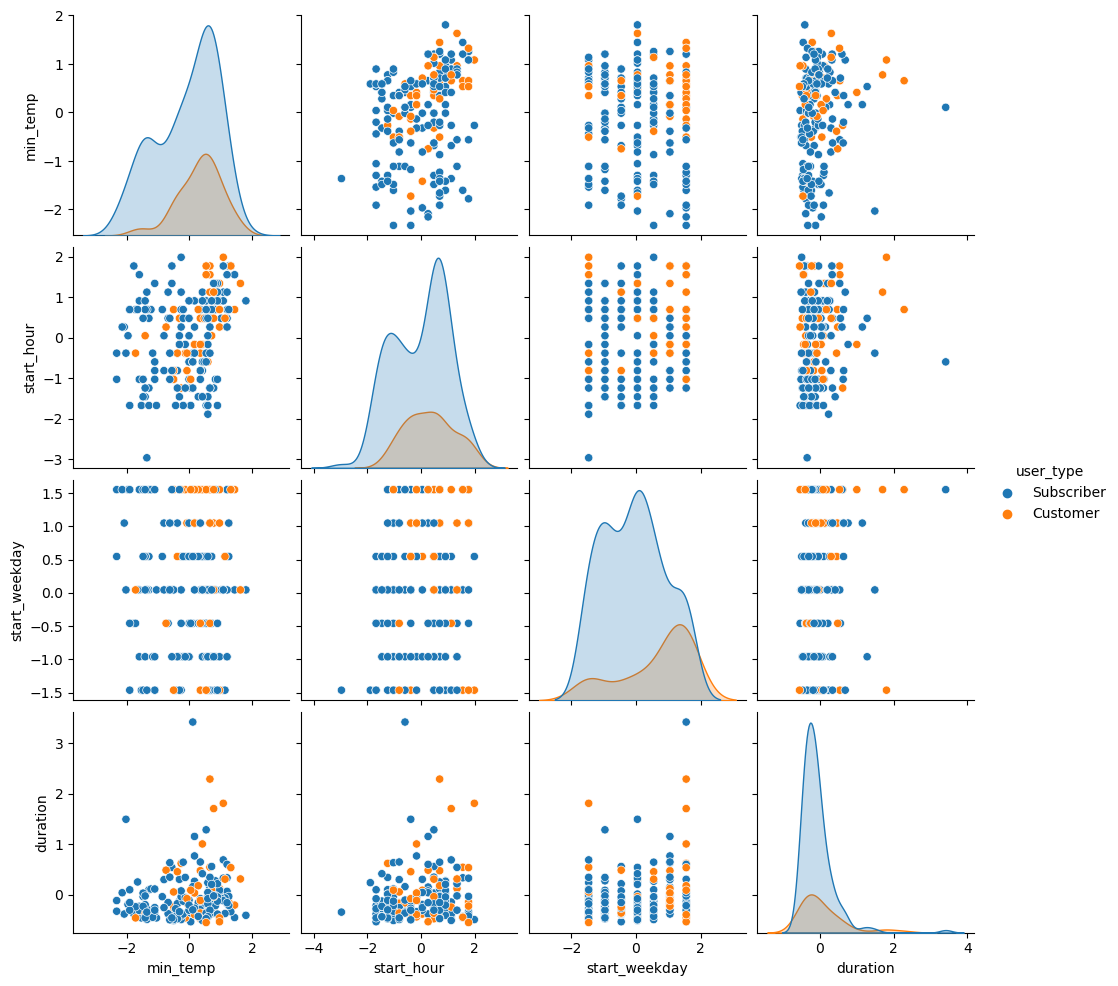

In [ ]:
sns.pairplot(data=bikesharing_transformed.sample(200, random_state=200)[continuous_cols + ordinal_cols + ["user_type"]], hue='user_type')

In [ ]:
bikesharing_sample = bikesharing_transformed.sample(200, random_state=200)[continuous_cols + ordinal_cols]

C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

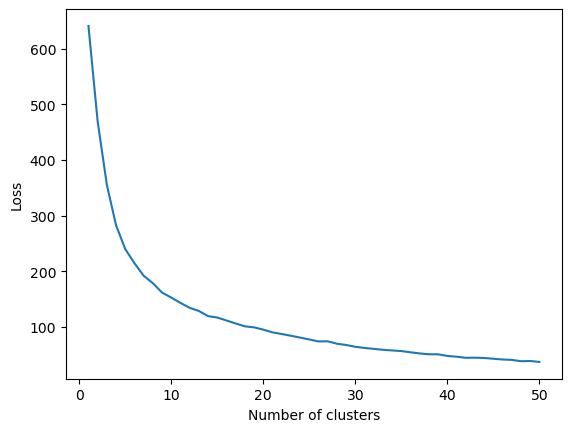

In [ ]:
k_max = 50
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(bikesharing_sample)
    clusters.append(k+1)
    losses.append(model.inertia_)

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

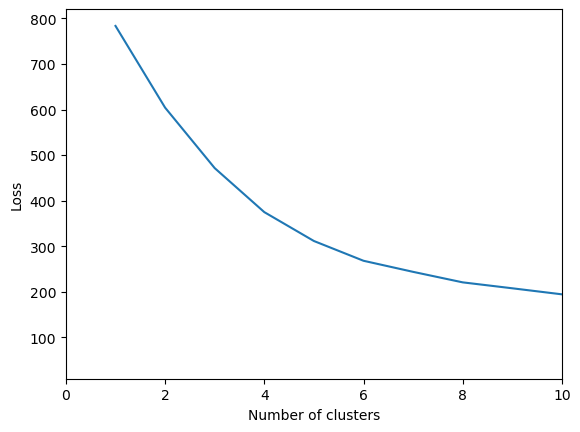

In [ ]:
plt.plot(pca_clusters, pca_losses)
plt.xlim([0,10])
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

In [ ]:
three_means = KMeans(n_clusters=3)
three_means.fit(bikesharing_sample)
three_means.predict(bikesharing_sample)

C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2,
       2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2,
       2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1,
       0, 1])

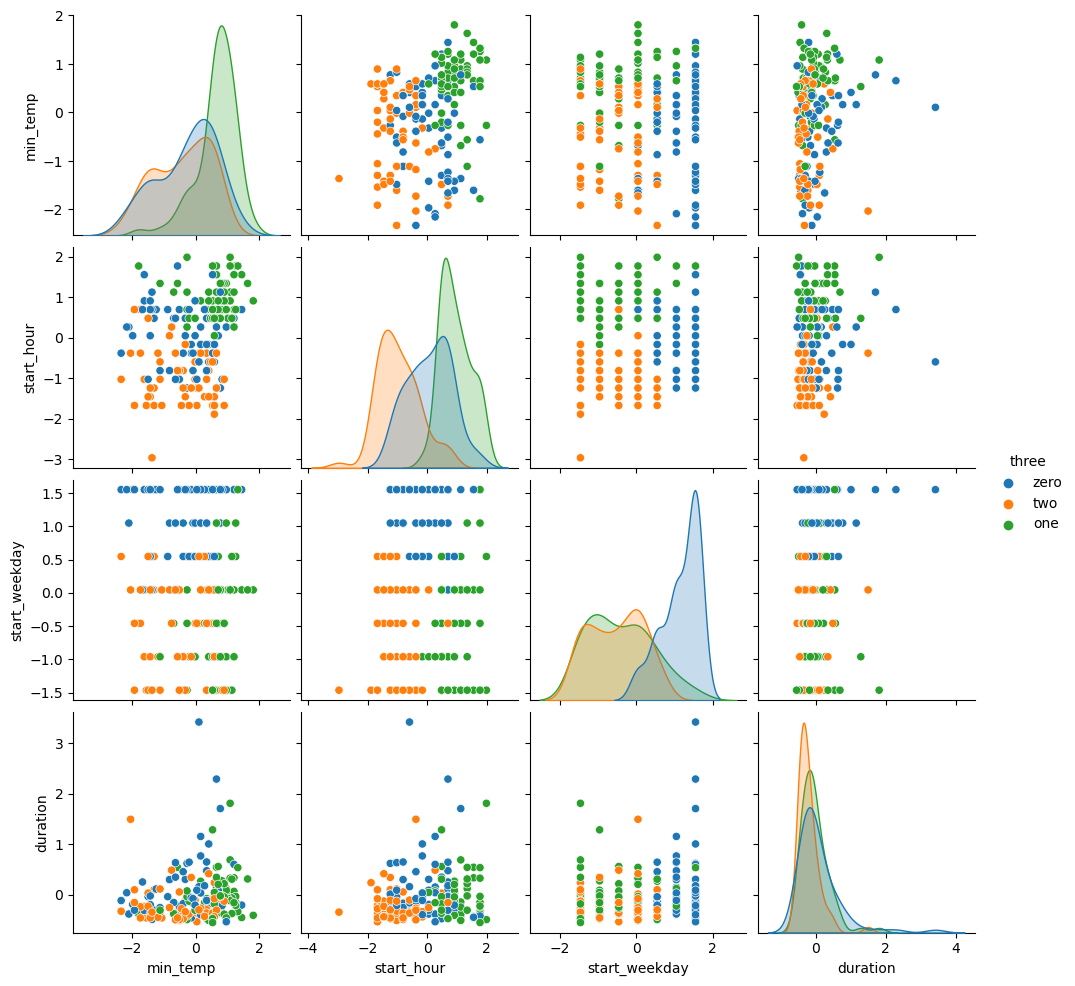

In [ ]:
numbers = ["zero", "one", "two"]

bikesharing_sample["three"] = three_means.predict(bikesharing_sample)
bikesharing_sample["three"] = bikesharing_sample["three"].apply(lambda x: numbers[x])
sns.pairplot(data=bikesharing_sample, hue="three")

C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


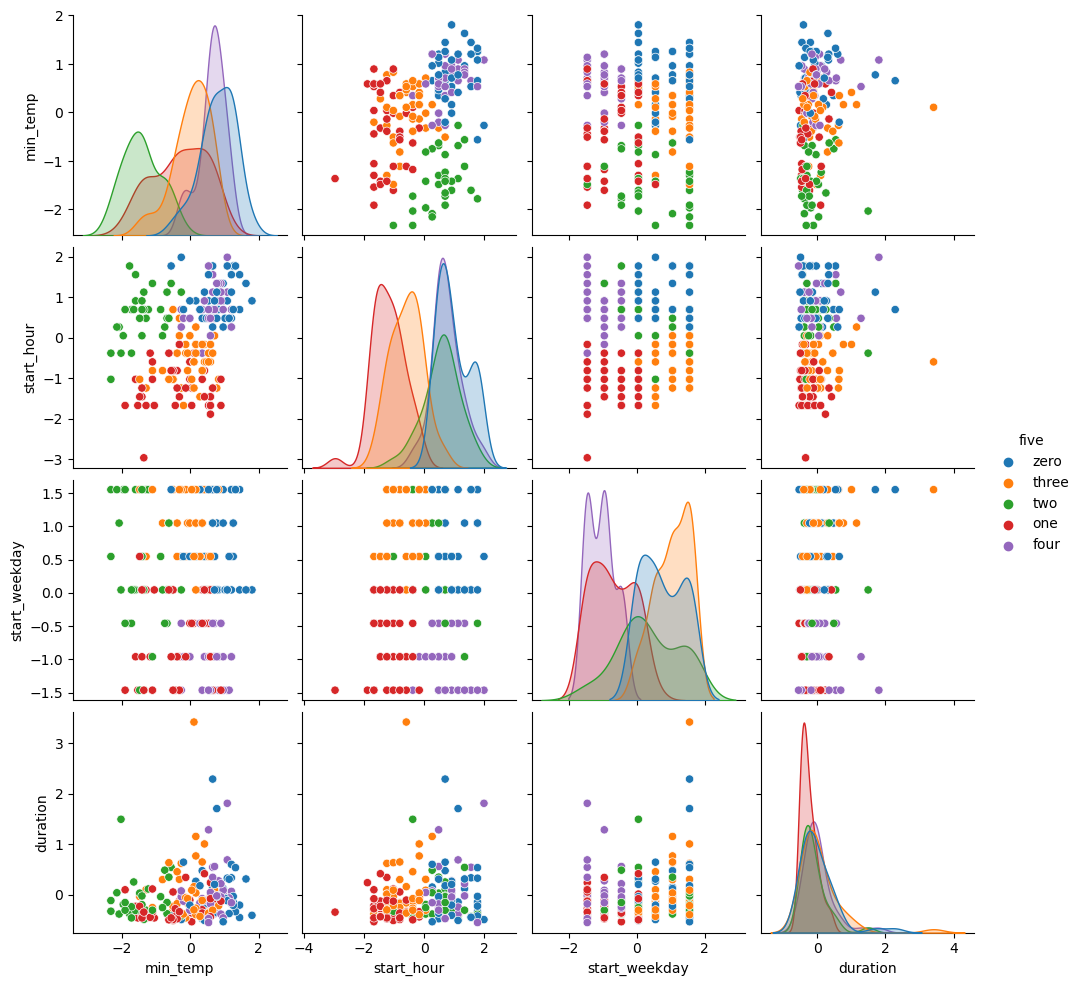

In [ ]:
bikesharing_sample = bikesharing_transformed.sample(200, random_state=200)[continuous_cols + ordinal_cols]
five_means = KMeans(n_clusters=5)
five_means.fit(bikesharing_sample)
five_means.predict(bikesharing_sample)
numbers = ["zero", "one", "two", "three", "four"]
bikesharing_sample["five"] = five_means.predict(bikesharing_sample)
bikesharing_sample["five"] = bikesharing_sample["five"].apply(lambda x: numbers[x])
sns.pairplot(data=bikesharing_sample, hue="five")

In [ ]:
bikesharing_sample = bikesharing_transformed.sample(200, random_state=200)[continuous_cols + ordinal_cols]
pca = PCA(n_components=1)
X_pca = pca.fit_transform(bikesharing_sample)
pca.components_

array([[-0.56773064, -0.7917626 , -0.20161567, -0.10072257]])

In [ ]:
pca.explained_variance_ratio_[0]

0.3809644229686465

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(bikesharing_sample)
sum(pca.explained_variance_ratio_)

0.9286515178719219

In [ ]:
bikesharing_pca = pd.DataFrame(X_pca, columns=["First PC", "Second PC", "Third PC"], index=bikesharing_sample.index)
bikesharing_pca.head()

,First PC,Second PC,Third PC
1818173,-0.748914,0.729982,-0.572570
3345318,-0.485596,1.498242,0.511067
41418,-0.532829,1.768863,1.883002
3589945,2.599235,-0.988819,0.468292
2375757,-2.015979,-1.768045,0.531743


C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

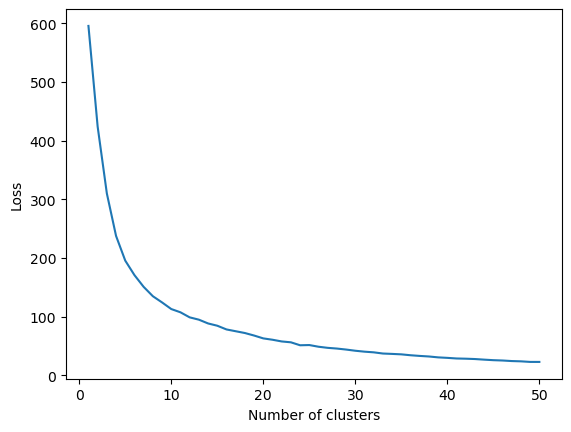

In [ ]:
pca_clusters = []
pca_losses = []

for i in range(k_max):
    model = KMeans(n_clusters=i+1)
    model.fit(X_pca)
    pca_clusters.append(i+1)
    pca_losses.append(model.inertia_)
    
plt.plot(pca_clusters, pca_losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

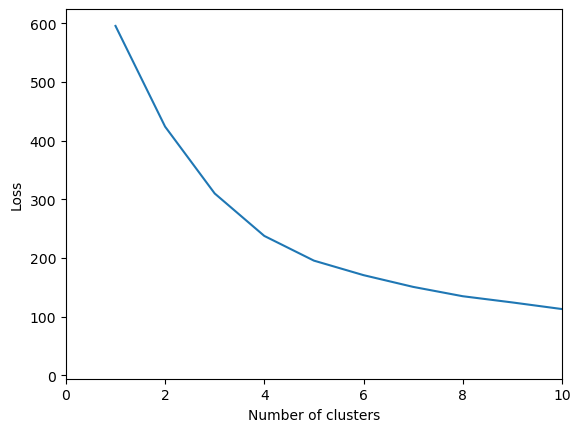

In [ ]:
plt.plot(pca_clusters, pca_losses)
plt.xlim([0,10])
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Onno Peters\anaconda3\envs\aaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


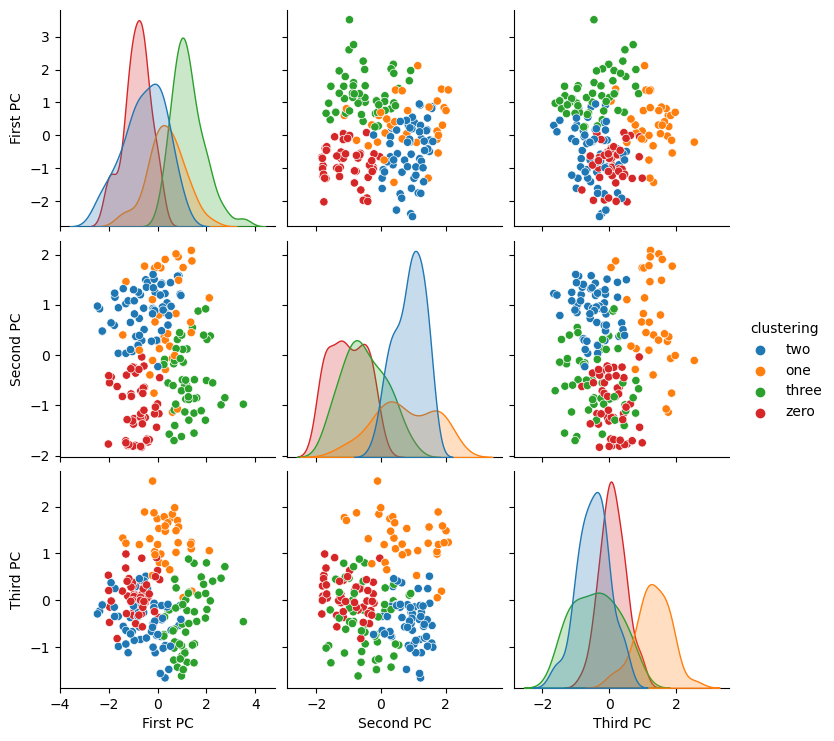

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(bikesharing_pca)
kmeans.predict(bikesharing_pca)
numbers = ["zero", "one", "two", "three"]
bikesharing_pca["clustering"] = kmeans.predict(bikesharing_pca)
bikesharing_pca["clustering"] = bikesharing_pca["clustering"].apply(lambda x: numbers[x])
sns.pairplot(data=bikesharing_pca, hue="clustering")

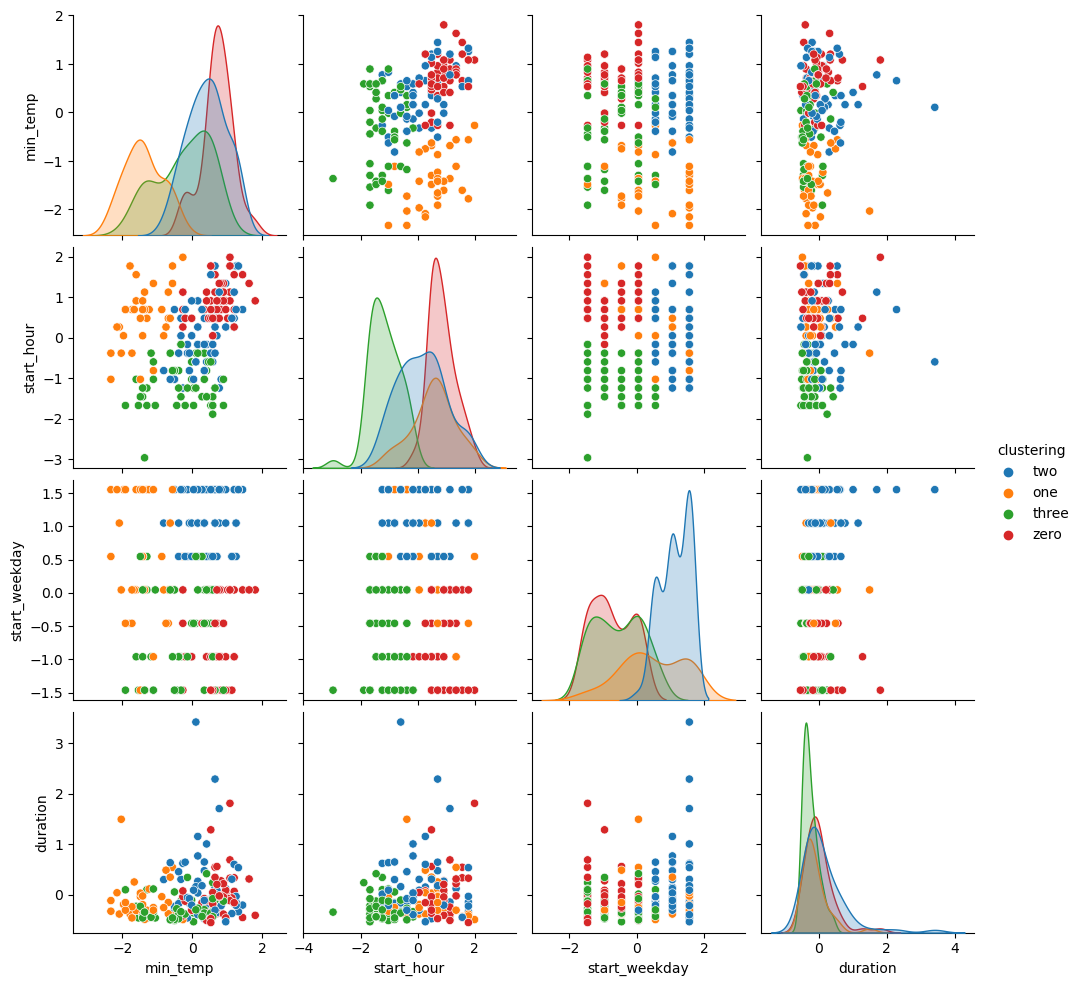

In [ ]:
bikesharing_sample["clustering"] = bikesharing_pca["clustering"]
sns.pairplot(data=bikesharing_sample, hue="clustering")

In [ ]:
def interpret(x):
    if x == "zero":
        x = "Leisure Trips"
    elif x == "one":
        x = "Afternoon Trip Warm"
    elif x == "two":
        x = "Afternoon Trip Cold"
    else:
        x = "Morning Trip"
    return x
        
bikesharing_sample["clustering"] = bikesharing_sample["clustering"].apply(lambda x: interpret(x))

In [ ]:
bikesharing_sample

,min_temp,start_hour,start_weekday,duration,clustering
1818173,0.653736,0.267073,1.050558,0.154907,Afternoon Trip Cold
3345318,-0.508422,0.697928,1.553288,-0.301979,Afternoon Trip Cold
41418,-1.604797,1.559638,1.553288,-0.426988,Afternoon Trip Warm
3589945,-1.539015,-1.671776,-1.463095,-0.454274,Morning Trip
2375757,1.081322,1.990494,-1.463095,1.808582,Leisure Trips
...,...,...,...,...,...
906271,0.039765,-1.025493,1.553288,0.092720,Afternoon Trip Cold
3678622,-0.563241,-0.810065,-0.960364,-0.454274,Morning Trip
2553516,0.708554,0.913356,0.045097,0.207576,Leisure Trips
2606609,0.774337,1.128783,1.553288,1.703879,Afternoon Trip Cold


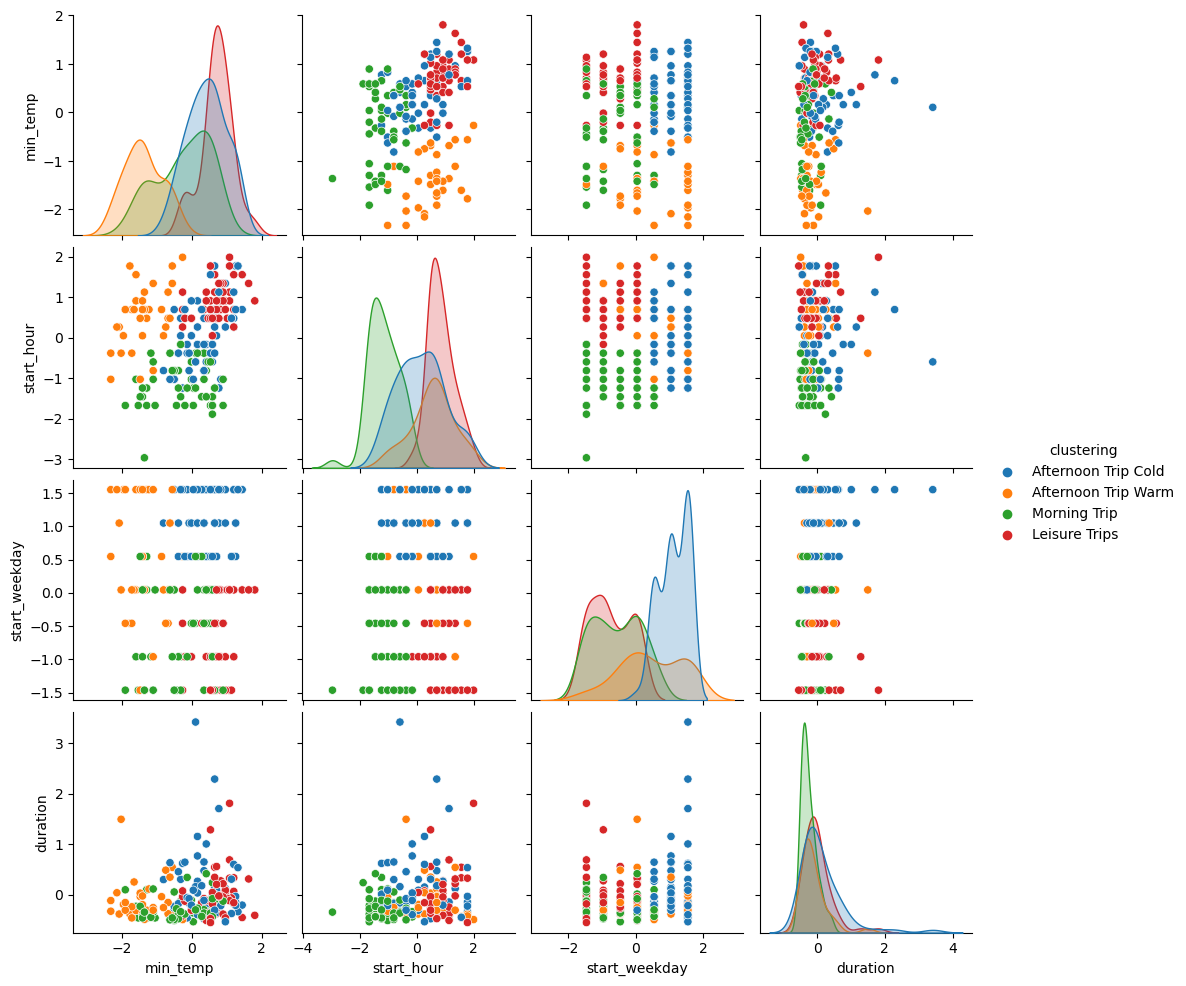

In [ ]:
sns.pairplot(data=bikesharing_sample, hue="clustering")